In [1]:
import matplotlib.pyplot as plt
import pickle


In [2]:
with open("plotdata(1)", "rb") as f:
    data = pickle.load(f)

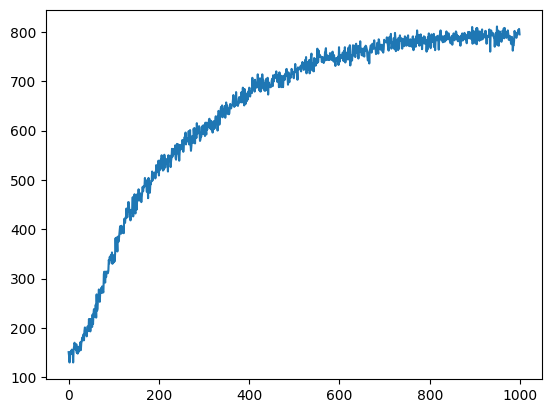

In [9]:
plt.plot(data['GNN Encoder'][:1000])

In [11]:
import seaborn as sns

KeyError: 'y'

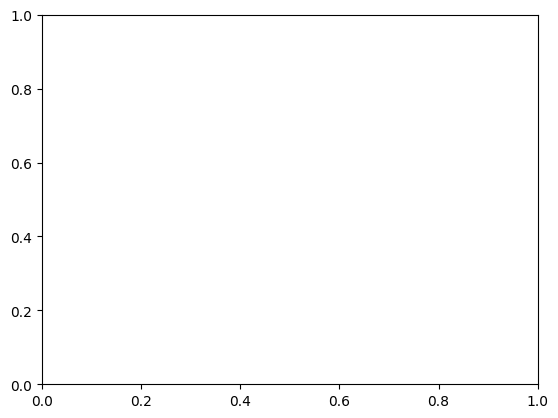

In [12]:
sns.lineplot(x=data['GNN Encoder'])

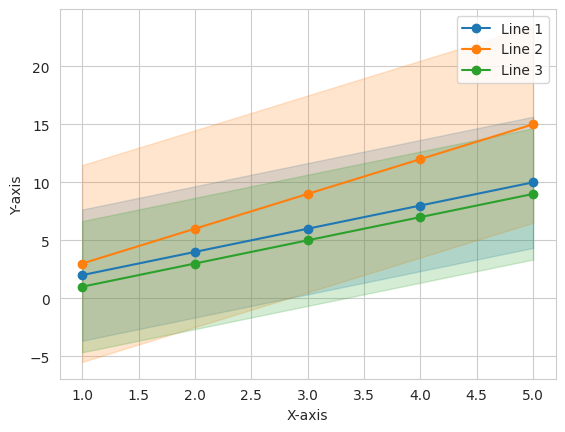

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_with_error_bars(x, y1, y2, y3, xlabel='X-axis', ylabel='Y-axis'):
    """
    Function to create a line plot using three Python lists with error bars as shaded regions.
    The shaded regions represent two standard deviations.

    Args:
    x (list): The x-axis values.
    y1 (list): The first y-axis values.
    y2 (list): The second y-axis values.
    y3 (list): The third y-axis values.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    """

    # Convert lists to numpy arrays
    x = np.array(x)
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)

    # Calculate the standard deviations
    y1_std = np.std(y1)
    y2_std = np.std(y2)
    y3_std = np.std(y3)

    # Set the Seaborn style
    sns.set_style("whitegrid")

    # Create the line plot and shaded regions
    plt.plot(x, y1, label='Line 1', marker='o', linestyle='-', color=sns.color_palette()[0])
    plt.fill_between(x, y1 - 2*y1_std, y1 + 2*y1_std, alpha=0.2, color=sns.color_palette()[0])

    plt.plot(x, y2, label='Line 2', marker='o', linestyle='-', color=sns.color_palette()[1])
    plt.fill_between(x, y2 - 2*y2_std, y2 + 2*y2_std, alpha=0.2, color=sns.color_palette()[1])

    plt.plot(x, y3, label='Line 3', marker='o', linestyle='-', color=sns.color_palette()[2])
    plt.fill_between(x, y3 - 2*y3_std, y3 + 2*y3_std, alpha=0.2, color=sns.color_palette()[2])

    # Add labels and legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    # Show the plot
    plt.show()

# Example usage with sample data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [3, 6, 9, 12, 15]
y3 = [1, 3, 5, 7, 9]

plot_with_error_bars(x, y1, y2, y3)


In [15]:
data.keys()

dict_keys(['GNN Encoder', 'Transformer Encoder', 'Original TacticZero'])

In [20]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def moving_average(x, window_size):
    return np.convolve(x, np.ones(window_size)/window_size, mode='valid')

def plot_moving_average_with_std(data_dict, window_size=50, xlabel='X-axis', ylabel='Y-axis'):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots()

    # Iterate over each key-value pair in the dictionary
    for i, (label, data) in enumerate(data_dict.items()):
        # Truncate data to be up to 1000 length
        data = data[:1000]

        # Convert list to numpy array
        data = np.array(data)

        # Calculate the moving averages
        data_ma = moving_average(data, window_size)

        # Calculate the standard deviations
        data_std = np.std(data_ma)

        # Create the line plot and shaded regions
        ax.plot(range(window_size-1, len(data)), data_ma, label=label, marker='o', linestyle='-', color=sns.color_palette()[i])
        ax.fill_between(range(window_size-1, len(data)), data_ma - data_std, data_ma + data_std, alpha=0.2, color=sns.color_palette()[i])

    # Add labels and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

    # Restrict y-axis to go from 0 to 1000
    ax.set_ylim([0, 1000])

    # Show the plot
    plt.show()

# # Example usage with sample data
# data_dict = {
# 'Line 1': [2, 4, 6, 8, 10, 12, 14, 16,


In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def moving_average_and_std(x, window_size):
    ma = np.convolve(x, np.ones(window_size)/window_size, mode='valid')
    std = [np.std(x[i:i+window_size]) for i in range(len(x) - window_size + 1)]
    return ma, std

def plot_moving_average_with_std(data_dict, window_size=3, xlabel='X-axis', ylabel='Y-axis'):
    # sns.set_style("whitegrid")
    fig, ax = plt.subplots()

    # Iterate over each key-value pair in the dictionary
    for i, (label, data) in enumerate(data_dict.items()):
        # Truncate data to be up to 1000 length
        data = data[:1000]

        # Convert list to numpy array
        data = np.array(data)

        # Calculate the moving averages and standard deviations within the window
        data_ma, data_std = moving_average_and_std(data, window_size)

        # Create the line plot and shaded regions
        ax.plot(range(window_size-1, len(data)), data_ma, label=label, marker='o', linestyle='-', color=sns.color_palette()[i])
        ax.fill_between(range(window_size-1, len(data)), data_ma - data_std, data_ma + data_std, alpha=0.01, color=sns.color_palette()[i])

    # Add labels and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

    # Restrict y-axis to go from 0 to 1000
    ax.set_ylim([0, 1000])

    # Show the plot
    plt.show()


In [42]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def moving_average_and_std(x, window_size):
    ma = np.convolve(x, np.ones(window_size)/window_size, mode='valid')
    std = [np.std(x[i:i+window_size]) for i in range(len(x) - window_size + 1)]
    return ma, std

def plot_moving_average_with_std(data_dict, window_size=3):
    fig, ax = plt.subplots()

    # Remove the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Iterate over each key-value pair in the dictionary
    for i, (label, data) in enumerate(data_dict.items()):
        data = [d/9.48 for d in data]
        # Truncate data to be up to 1000 length
        data = data[:1000]

        # Convert list to numpy array
        data = np.array(data)

        # Calculate the moving averages and standard deviations within the window
        data_ma, data_std = moving_average_and_std(data, window_size)

        # Create the line plot and shaded regions
        line_color = sns.color_palette()[i]
        region_color = mcolors.to_rgba(line_color, alpha=0.4)
        ax.plot(range(window_size-1, len(data)), data_ma, label=label, marker='o', linestyle='-', color=line_color)
        ax.fill_between(range(window_size-1, len(data)), data_ma - data_std, data_ma + data_std, color=region_color)

    # Add labels and legend
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Goals Proven')
    ax.legend()

    # Remove the grid
    ax.grid(False)

    # Restrict y-axis to go from 0 to 1000
    ax.set_ylim([0, 100])

    # Restrict x-axis to start from 0
    ax.set_xlim(left=0)

    # Show the plot
    plt.show()



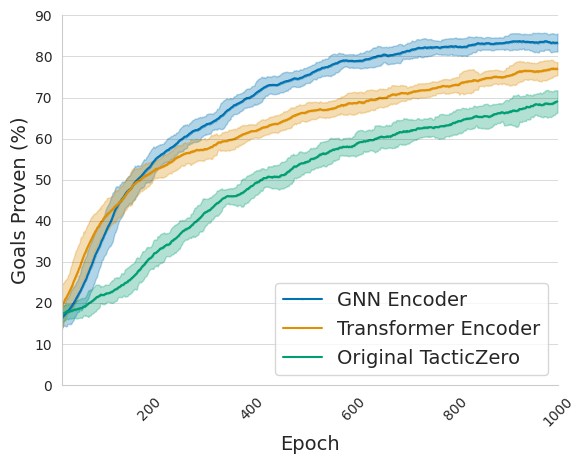

In [132]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def moving_average_and_std(x, window_size):
    ma = np.convolve(x, np.ones(window_size)/window_size, mode='valid')
    std = [np.std(x[i:i+window_size]) * 2 for i in range(len(x) - window_size + 1)]
    return ma, std

def plot_moving_average_with_std(data_dict, window_size=30):
    fig, ax = plt.subplots()

    # Remove the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Set a custom color palette for the lines
    # line_colors = sns.color_palette("tab10", len(data_dict))
    # # Set a custom color palette for the shaded regions
    # region_colors = sns.color_palette("pastel", len(data_dict))

    line_colors = sns.color_palette("colorblind", len(data_dict))
    region_colors = sns.color_palette("colorblind", len(data_dict))


    markers = ['o', 's', '^']


    # Iterate over each key-value pair in the dictionary
    for i, (label, data) in enumerate(data_dict.items()):
        data = [d / 9.48 for d in data]
        # Truncate data to be up to 1000 length
        data = data[:1000]

        # Convert list to numpy array
        data = np.array(data)

        # Calculate the moving averages and standard deviations within the window
        data_ma, data_std = moving_average_and_std(data, window_size)

        # Create the line plot and shaded regions
        # ax.plot(range(window_size-1, len(data)), data_ma, label=label, marker='o', linestyle='-', color=line_colors[i], alpha=0.1)
        # ax.plot(range(window_size-1, len(data)), data_ma, label=label, marker=markers[i], color=line_colors[i], alpha=1)
        ax.plot(range(window_size-1, len(data)), data_ma, label=label, marker=markers[i], linestyle='-', color=line_colors[i], alpha=1.0,
                markersize=0.1)
        # ax.plot(range(window_size-1, len(data)), data_ma, label=label, marker=markers[i], linestyle='-', color=line_colors[i], alpha=1.0)

        ax.fill_between(range(window_size-1, len(data)), data_ma - data_std, data_ma + data_std, color=region_colors[i], alpha=0.3)


        # ax.plot(range(window_size-1, len(data)), data_ma + data_std, marker=markers[i], linestyle='', color=line_colors[i], markersize=5)
        # ax.plot(range(window_size-1, len(data)), data_ma - data_std, marker=markers[i], linestyle='', color=line_colors[i], markersize=5)

    # Add labels and legend
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('Goals Proven (%)', fontsize=14)
    ax.legend(loc='lower right', fontsize=14)

    # Remove the grid
    ax.grid(False)

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # Restrict y-axis to go from 0 to 1000
    ax.set_ylim([0, 90])

    # Restrict x-axis to start from 0
    ax.set_xlim(left=window_size - 1, right=1000)
    # ax.axhspan(ymin=10, ymax=90, facecolor='grey', alpha=0.0003)

    ax.axhline(y=10, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
    ax.axhline(y=20, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
    ax.axhline(y=30, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
    ax.axhline(y=40, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
    ax.axhline(y=50, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
    ax.axhline(y=60, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
    ax.axhline(y=70, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
    ax.axhline(y=80, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)
    ax.axhline(y=90, color='black', linestyle='solid', linewidth=0.5, alpha=0.2)


    plt.xticks(rotation=45)

    plt.savefig('plot.pdf', format='pdf', bbox_inches='tight')
    # Show the plot
    plt.show()



plot_moving_average_with_std(data)